In [3]:
import os
import warnings
from pathlib import Path

# --- Working directory ---
PROJECT_DIR = Path().resolve()
PROJECT_ROOT_NAME = 'face-mediapipe'

while PROJECT_DIR.name != PROJECT_ROOT_NAME and PROJECT_DIR != PROJECT_DIR.parent:
    PROJECT_DIR = PROJECT_DIR.parent

if Path().resolve() != PROJECT_DIR:
    os.chdir(PROJECT_DIR)

Iteration 1, loss = 16.41186032
Validation score: 0.435897
Iteration 2, loss = 20.35900374
Validation score: 0.564103
Iteration 3, loss = 15.68475450
Validation score: 0.564103
Iteration 4, loss = 15.68475422
Validation score: 0.564103
Iteration 5, loss = 15.68475390
Validation score: 0.435897
Iteration 6, loss = 20.35900256
Validation score: 0.435897
Iteration 7, loss = 20.35900220
Validation score: 0.435897
Iteration 8, loss = 16.30798602
Validation score: 0.564103
Iteration 9, loss = 15.68475243
Validation score: 0.564103
Iteration 10, loss = 15.68475202
Validation score: 0.564103
Iteration 11, loss = 18.07381220
Validation score: 0.435897
Iteration 12, loss = 20.35900017
Validation score: 0.461538
Iteration 13, loss = 17.29813285
Validation score: 0.564103
Iteration 14, loss = 15.68475031
Validation score: 0.564103
Iteration 15, loss = 13.91311796
Validation score: 0.435897
Iteration 16, loss = 20.33817697
Validation score: 0.435897
Iteration 17, loss = 13.78067806
Validation score

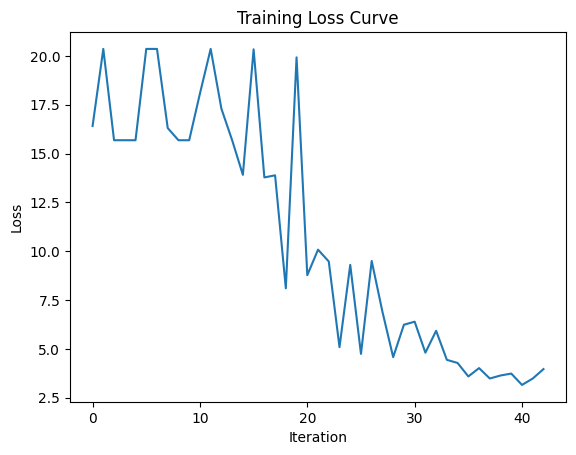

Model saved to face_emotion_mlp.joblib
Test Accuracy: 0.8426
Test Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84        47
           1       0.96      0.75      0.84        61

    accuracy                           0.84       108
   macro avg       0.85      0.86      0.84       108
weighted avg       0.87      0.84      0.84       108



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt

# Prepare data
data_path = 'face_landmarks.csv'
df = pd.read_csv(data_path)

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Stratified split: Train+Val and Test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Stratified split: Train and Val
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.1, random_state=42, stratify=y_trainval)

# Initialize MLP with early stopping parameters
model = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=1000,
    early_stopping=True,
    n_iter_no_change=20,
    validation_fraction=0.1,
    tol=1e-4,
    random_state=42,
    verbose=True
)

# Train model
model.fit(X_train, y_train)

# Validation prediction and evaluation
y_pred = model.predict(X_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(classification_report(y_val, y_pred))

# Plot training loss curve
plt.plot(model.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Save the model
model_filename = 'face_emotion_mlp.joblib'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Optional: Evaluate on test set
y_test_pred = model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
